<a href="https://www.kaggle.com/code/peterznw/ptw-cnn-pet-adoption?scriptVersionId=172563063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Deep Learning Pet Adoption by DenseNet from Keras CNN
## Agenda Introduction
1. Data Exploration
2. Data preprocessing: 
>     Binary
>     Data Balancing
3. Image Exploration &  Analysis
4. Model Training
5. Evaluate
6. Test
7. Probablity


### References
* DenseNet- Keras: https://keras.io/api/applications/densenet/
* https://www.kaggle.com/code/xhlulu/keras-cnn-starter-petfinder


In [1]:
import os
import cv2
import math
import json

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Data Exploration

In [2]:
train_df = pd.read_csv('../input/train/train.csv')
test_df = pd.read_csv('../input/test/test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(14993, 24)
(3972, 23)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## 2. Data preprocessing

### A. Binary
Turn predict value from multi-catergory to binary 1 and 0. Create new value called "AdoptionStatus"
* **Adopted value**: 1 = 0+1+2+3
* **Not Adopted value**: 0 = 4
> 0 - Pet was adopted on the same day as it was listed. 
> 
> 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
> 
> 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
> 
> 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
> 
> 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


In [3]:
# Transforming 'AdoptionSpeed' to binary "AdoptionStatus"
train_df['AdoptionStatus'] = train_df['AdoptionSpeed'].apply(lambda x: 0 if x == 4 else 1)


In [4]:
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,AdoptionStatus
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1


#Split train data

In [5]:
#from sklearn.model_selection import train_test_split

# Splitting the original dataset into training and testing sets
#train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

### B. Data Balancing
Enhances Model Accuracy on Minority Classes, avoids Overfitting to Majority Class


**Statical Overview**

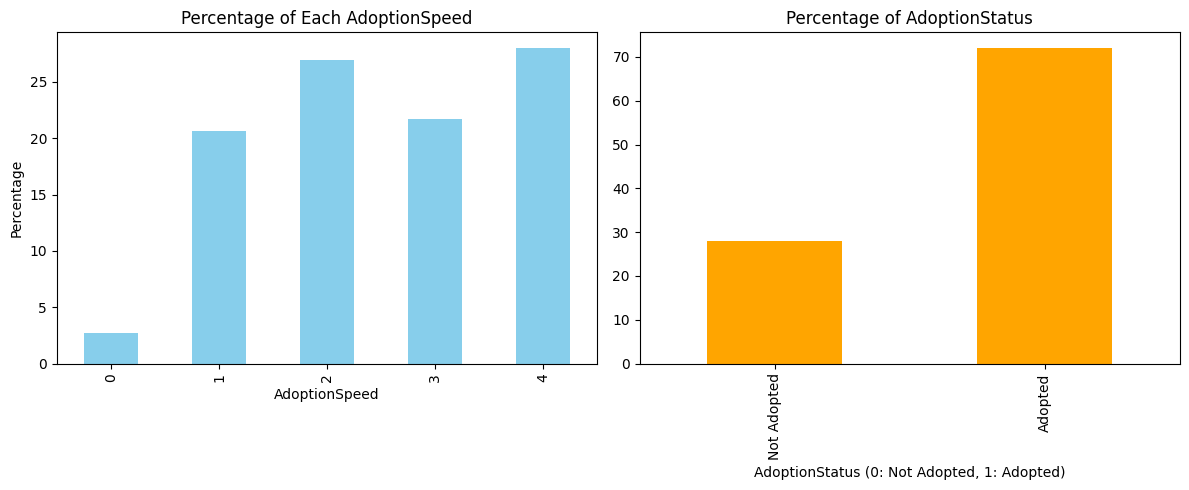

In [6]:
# Calculate the percentages
adoption_speed_percentage = train_df.groupby('AdoptionSpeed').size() / len(train_df) * 100
adoption_status_percentage = train_df.groupby('AdoptionStatus').size() / len(train_df) * 100

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot for AdoptionSpeed
plt.subplot(1, 2, 1)
adoption_speed_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each AdoptionSpeed')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Percentage')

# Plot for AdoptionStatus
plt.subplot(1, 2, 2)
adoption_status_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of AdoptionStatus')
plt.xlabel('AdoptionStatus (0: Not Adopted, 1: Adopted)')
plt.xticks([0, 1], ['Not Adopted', 'Adopted'])

plt.tight_layout()
plt.show()

We can clearly see the unbalance.

In [7]:
min_class_size = min(train_df['AdoptionStatus'].value_counts())
max_class_size = max(train_df['AdoptionStatus'].value_counts())
print(f"min: {min_class_size}")
print(f"max: {max_class_size}")

min: 4197
max: 10796


Let's do the balance and keep the distribution ratio of "Adoptionspeed" 0,1,2,3 in their Sum "AdoptionStatus"

In [8]:
#adoption_speed_zero = balanced_train[balanced_train['AdoptionSpeed'] == 0]

#adoption_speed_zero.head()

In [9]:
from sklearn.utils import resample
# Separate samples for each label within the "AdoptedSpeed" class in the training set
adopted_label_0 = train_df[train_df['AdoptionSpeed'] == 0]
adopted_label_1 = train_df[train_df['AdoptionSpeed'] == 1]
adopted_label_2 = train_df[train_df['AdoptionSpeed'] == 2]
adopted_label_3 = train_df[train_df['AdoptionSpeed'] == 3]
adopted_label_4 = train_df[train_df['AdoptionSpeed'] == 4]

# Sample an equal number of "Not Adopted" samples for each label within the "Adopted" class in the training set
not_adopted_samples = train_df[train_df['AdoptionStatus'] == 0]

# Downsampling the adopted labels in the training set
adopted_downsampled_label_0 = resample(adopted_label_0, replace=False, n_samples=len(adopted_label_0), random_state=42)
adopted_downsampled_label_1 = resample(adopted_label_1, replace=False, n_samples=len(adopted_label_1), random_state=42)
adopted_downsampled_label_2 = resample(adopted_label_2, replace=False, n_samples=len(adopted_label_2), random_state=42)
adopted_downsampled_label_3 = resample(adopted_label_3, replace=False, n_samples=len(adopted_label_3), random_state=42)
adopted_downsampled_label_4 = resample(adopted_label_4, replace=False, n_samples=len(adopted_label_4), random_state=42)

# Concatenating the downsampled adopted samples with the not adopted samples in the training set
balanced_train_df = pd.concat([adopted_downsampled_label_0, adopted_downsampled_label_1, adopted_downsampled_label_2, adopted_downsampled_label_3, adopted_downsampled_label_4, not_adopted_samples])

# Shuffle the balanced training dataset
balanced_train = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)


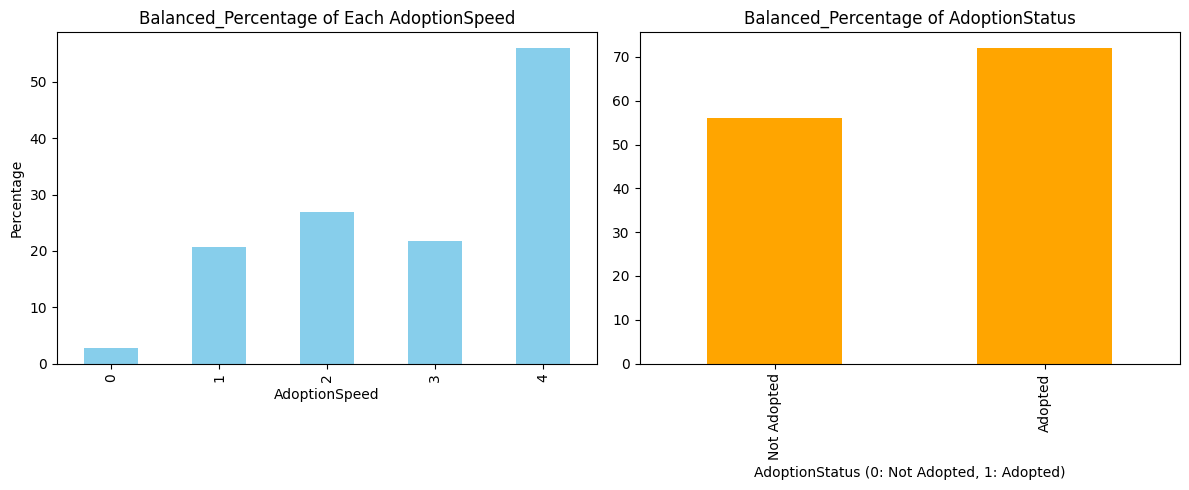

In [10]:
# Calculate the percentages
balanced_adoption_speed_percentage = balanced_train.groupby('AdoptionSpeed').size() / len(train_df) * 100
balanced_adoption_status_percentage = balanced_train.groupby('AdoptionStatus').size() / len(train_df) * 100

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot for AdoptionSpeed
plt.subplot(1, 2, 1)
balanced_adoption_speed_percentage.plot(kind='bar', color='skyblue')
plt.title('Balanced_Percentage of Each AdoptionSpeed')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Percentage')

# Plot for AdoptionStatus
plt.subplot(1, 2, 2)
balanced_adoption_status_percentage.plot(kind='bar', color='orange')
plt.title('Balanced_Percentage of AdoptionStatus')
plt.xlabel('AdoptionStatus (0: Not Adopted, 1: Adopted)')
plt.xticks([0, 1], ['Not Adopted', 'Adopted'])

plt.tight_layout()
plt.show()

**Comparision**

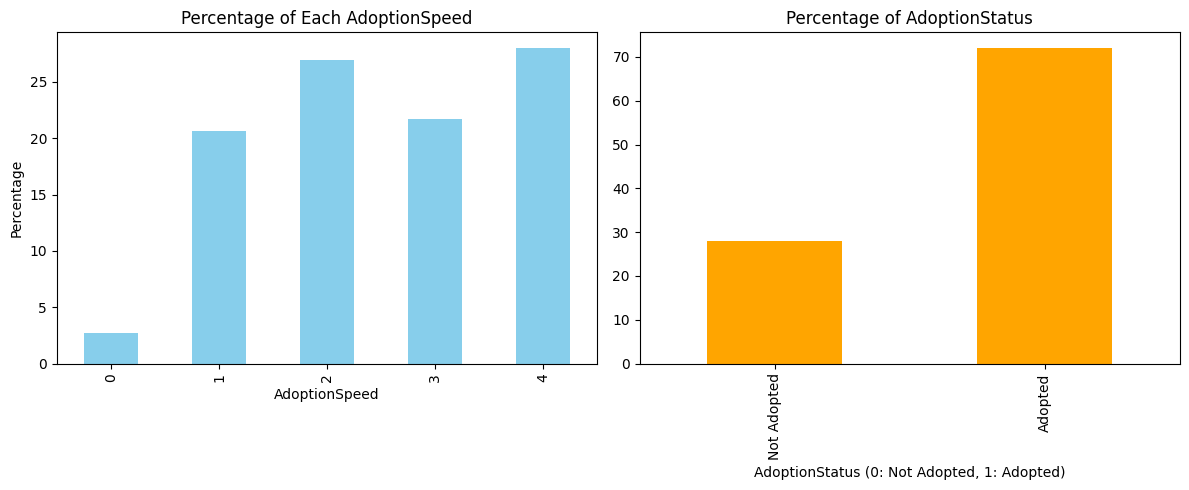

In [11]:
# Calculate the percentages
adoption_speed_percentage = train_df.groupby('AdoptionSpeed').size() / len(train_df) * 100
adoption_status_percentage = train_df.groupby('AdoptionStatus').size() / len(train_df) * 100

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot for AdoptionSpeed
plt.subplot(1, 2, 1)
adoption_speed_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each AdoptionSpeed')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Percentage')

# Plot for AdoptionStatus
plt.subplot(1, 2, 2)
adoption_status_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of AdoptionStatus')
plt.xlabel('AdoptionStatus (0: Not Adopted, 1: Adopted)')
plt.xticks([0, 1], ['Not Adopted', 'Adopted'])

plt.tight_layout()
plt.show()

In [12]:
min_class_size = min(balanced_train['AdoptionStatus'].value_counts())
max_class_size = max(balanced_train['AdoptionStatus'].value_counts())
print(f"min: {min_class_size}")
print(f"max: {max_class_size}")

min: 8394
max: 10796


Seems Downsampling created another extreme, lets try upsampling

## 3. Image Exploration &  Analysis

In [13]:
name_target_dict = train_df.set_index('PetID')['AdoptionStatus'].to_dict()
train_image_names = os.listdir('../input/train_images')
test_image_names = os.listdir('../input/test_images')

In [14]:
# Print the first 5 items in the dictionary
print(dict(list(name_target_dict.items())[:30]))


{'86e1089a3': 1, '6296e909a': 1, '3422e4906': 1, '5842f1ff5': 1, '850a43f90': 1, 'd24c30b4b': 1, '1caa6fcdb': 1, '97aa9eeac': 1, 'c06d167ca': 1, '7a0942d61': 0, '8b693ca84': 1, '8e76c8e39': 1, 'aaedd873d': 1, '4a9793dfb': 1, 'c02be41e6': 1, '1fd342e17': 0, 'b38a74866': 1, 'f9d07d5fa': 0, '1c92ce464': 1, 'b10e7605a': 0, '6436c1a59': 1, '234a5a54c': 0, '1bc0f89d8': 0, '1bf24d8be': 0, '988988d5b': 1, 'cf7d3eec0': 1, '85fc3c314': 1, 'efbf1703a': 1, '7843a9dca': 1, 'd341fbfd6': 1}


Displayed images average size: 399.75x422.25


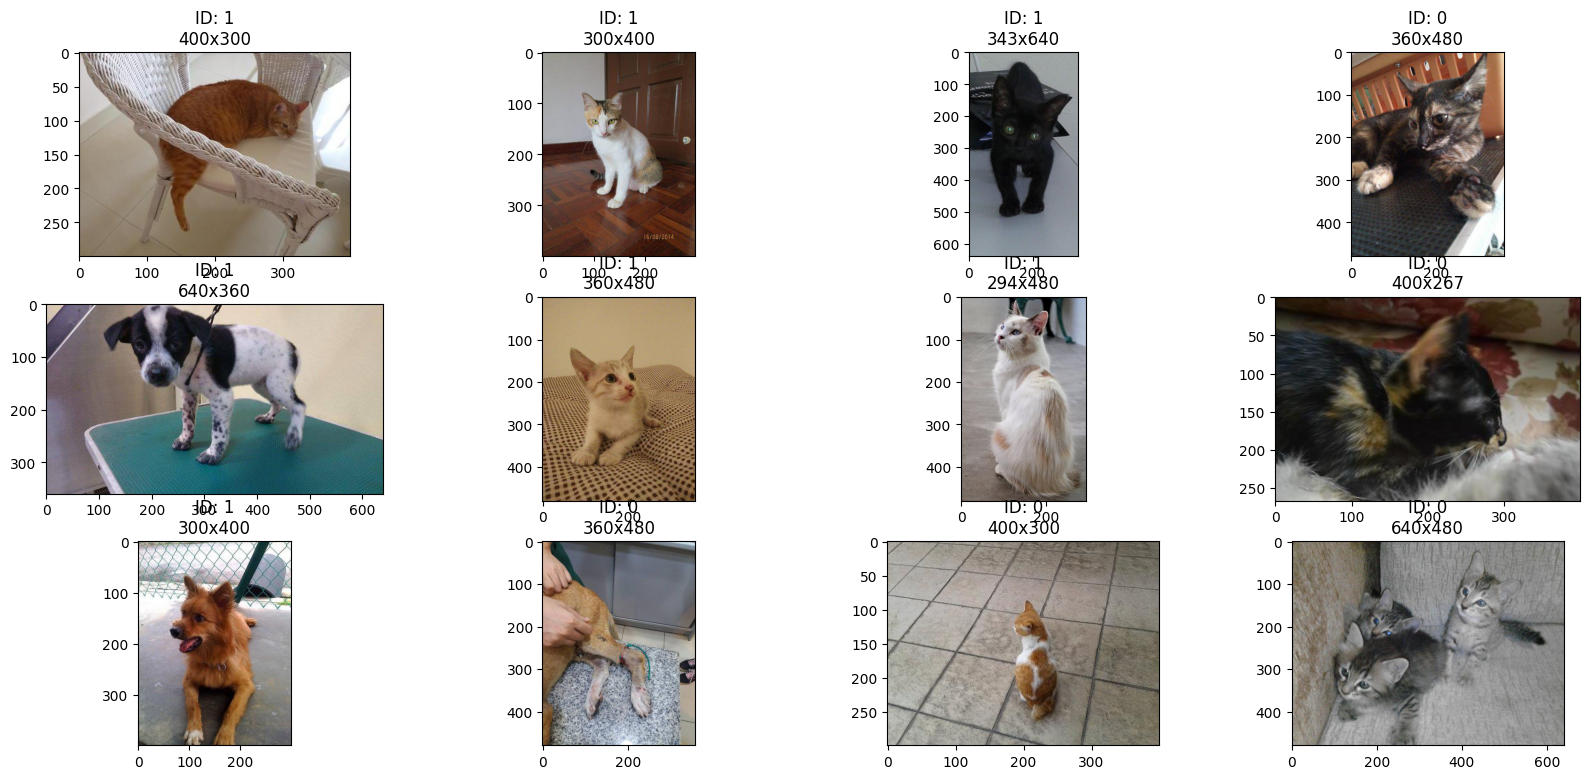

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_samples_and_analyze_size(columns=4, rows=3):
    fig = plt.figure(figsize=(5*columns, 3*rows))
    widths = []
    heights = []
    
    for i in range(columns*rows):
        if i >= len(train_image_names):
            break  # Prevent index out of range
        image_path = train_image_names[i]
        pet_id = image_path.split('-')[0]
        
        # Check if the PetID exists in name_target_dict
        if pet_id not in name_target_dict:
            print(f"PetID {pet_id} not found in dictionary, skipped")
            continue  # Skip this image
        
        image_id = name_target_dict[pet_id]
        img = cv2.imread(f'../input/train_images/{image_path}')
        
        if img is None:
            print(f"Image at {image_path} N/A, skipped")
            continue  # Skip if image cannot be loaded
        
        height, width, _ = img.shape
        widths.append(width)
        heights.append(height)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(f"ID: {image_id}\n{width}x{height}")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        
    avg_width = np.mean(widths)
    avg_height = np.mean(heights)
    print(f"Displayed images average size: {avg_width}x{avg_height}")
    
    return widths, heights

# Call the function and receive the size data
widths, heights = display_samples_and_analyze_size()


**Find the unit size**


View through iamge data, most of the picutre took by phone, either Horizontal or vertical screen.
Use both train and test data because we want picture data as big as possible so we can find better "the most common size" that people usually upload.

In [16]:
import os
from PIL import Image
import pandas as pd

# Assuming these directories are correctly defined and exist
train_images = '../input/train_images'
test_images = '../input/test_images'

# Function to get image sizes from a directory
def get_image_sizes(directory):
    image_sizes = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add or remove file types as needed
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append((width, height))
    return image_sizes

# Corrected: pass the directory paths directly to t  he function
combined_image_sizes = get_image_sizes(train_images) + get_image_sizes(test_images)

# Convert the list of sizes into a pandas DataFrame
df = pd.DataFrame(combined_image_sizes, columns=['Width', 'Height'])

# Create a 'Size' column for easier aggregation
df['Size'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Count the occurrences of each size
size_counts = df['Size'].value_counts()

# Find the most common size
most_common_size = size_counts.idxmax()

print(f"The most common image size across both datasets is: {most_common_size}")


The most common image size across both datasets is: 400x300


Base on result,we will use 400x300 later as input pic_size

### Adjust pic size
**Resize or Crop?**
https://wandb.ai/ayush-thakur/dl-question-bank/reports/How-to-Handle-Images-of-Different-Sizes-in-a-Convolutional-Neural-Network--VmlldzoyMDk3NzQ

For pet adoption speed prediction, **resizing** could be preferable when the overall image context matters, while cropping might be better to highlight specific features of interest, such as facial expressions or body shape of pets.

## 2. Dataframe and Data Generator

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-17 22:10:57.329695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 22:10:57.329792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 22:10:57.472266: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


We first create a dataframe to be used by the generator.

In [18]:
# Recreate name_target_dict from the balanced dataset
name_target_dict = balanced_train.set_index('PetID')['AdoptionStatus'].to_dict()

# Filter train_image_names to keep only those existing in name_target_dict
filtered_train_image_names = [name for name in train_image_names if name.split('-')[0] in name_target_dict]

# Then, proceed with creating generator_dict using the filtered list
generator_dict = {'filename': [], 'class': []}

for name in filtered_train_image_names:
    short_name = name.split('-')[0]
    label = name_target_dict[short_name]
    generator_dict['filename'].append(name)
    generator_dict['class'].append(label)

generator_df = pd.DataFrame(generator_dict)


In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,  # simulate the different angles cats and dogs may appear at. Excessive rotation angles may make it difficult to identify animals in images
    width_shift_range=0.1,  # To avoid important features (such as faces) from moving outside the image boundaries.
    height_shift_range=0.1,  # SAME
    horizontal_flip=True,  # Simulate the movements of cats and dogs turning over， Robust(make it stable), Data diversity
    fill_mode='nearest',  # Fill newly created pixels with neighboring pixels
    rescale=1/255.,  
    validation_split=0.1  # 10%
)




Resize to 400x300

In [20]:
# Convert 'class' column to string type
generator_df['class'] = generator_df['class'].astype(str)


def create_generator(subset):
    return datagen.flow_from_dataframe(
        generator_df,
        '../input/train_images',
        x_col='filename',
        y_col='class',
        has_ext=True,
        target_size=(400, 300),
        color_mode='rgb',
        class_mode='binary',
        batch_size=8,
        shuffle=True,
        seed=2018,
        subset=subset
    )

train_generator = create_generator('training')
val_generator = create_generator('validation')


Found 52480 validated image filenames belonging to 2 classes.
Found 5831 validated image filenames belonging to 2 classes.


## 4. Model Training

In [21]:
import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Load DenseNet121 with ImageNet weights as the base model, adjusting input_shape to 400x300
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(400, 300, 3))

# Adding layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Assemble the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup callbacks
callbacks = [
    ModelCheckpoint('model_best.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    TensorBoard(log_dir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
]

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=callbacks,
    verbose=1
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1713392119.658754      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6560/6560 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7543 - loss: 0.5760
Epoch 1: val_accuracy improved from -inf to 0.76271, saving model to model_best.keras
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 1636s 220ms/step - accuracy: 0.7543 - loss: 0.5760 - val_accuracy: 0.7627 - val_loss: 0.6122
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.76271
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.6078
Epoch 3/10
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.7599 - loss: 0.5494
Epoch 3: val_accuracy did not improve from 0.76271
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 1454s 221ms/step - accuracy: 0.7599 - loss: 0.5494 - val_accuracy: 0.7625 - val_loss: 0.9110
Epoch 4/10

Epoch 4: val_accuracy improved from 0.76271 to 0.85714, saving model to model_best.keras
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 2s 253us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8571 - val_loss: 0.3642
Epoch 5/10
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7616 - loss: 0.5465
Epoch 5: val_accuracy did not improve from 0.85714
6560/6560 ━━━━━━━━━━━━━━━━━━━━ 1437s 219ms/step - accuracy: 0.7616 - loss: 0.5465 - val_accuracy: 0.7625 - val_loss: 0.5585
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.857

## 5. Evaluation

In [22]:
model.load_weights('model_best.keras')

val_scores = model.evaluate(
    val_generator,
    steps=len(val_generator),
    verbose=1
)

print('\nValidation loss:', val_scores[0])
print('Validation accuracy:', val_scores[1])

729/729 ━━━━━━━━━━━━━━━━━━━━ 136s 187ms/step - accuracy: 0.7654 - loss: 0.9164

Validation loss: 0.9332752823829651
Validation accuracy: 0.7626479268074036


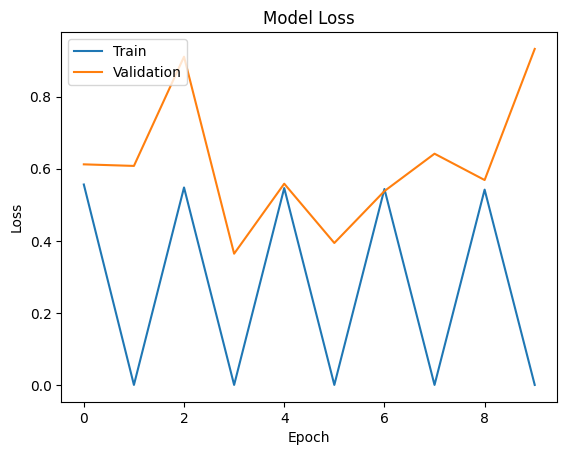

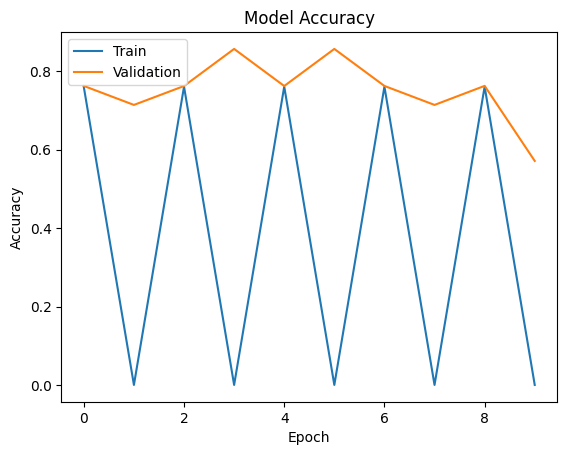

In [23]:
# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Plot training & validation loss values
history_df[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
# Make sure to use 'accuracy' and 'val_accuracy' based on the error message you received
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 6. Test

In [24]:
submission_dict = {'PetID': [], 'filename': []}

for name in test_image_names:
    pet_id = name.split('-')[0]
    submission_dict['PetID'].append(pet_id)
    submission_dict['filename'].append(name)
    
submission_df = pd.DataFrame(submission_dict)
submission_df.head()

,PetID,filename
0,b404dff05,b404dff05-5.jpg
1,e2da8e717,e2da8e717-3.jpg
2,9992b9fce,9992b9fce-10.jpg
3,250535a24,250535a24-3.jpg
4,e7252c4ee,e7252c4ee-3.jpg


In [25]:
test_generator = ImageDataGenerator(rescale=1/255.).flow_from_dataframe(
    submission_df,
    '../input/test_images',
    has_ext=True,
    target_size=(400, 300),
    color_mode='rgb',
    batch_size=256,
    shuffle=False,
    class_mode=None
)

Found 14465 validated image filenames.


In [26]:
test_predictions = model.predict(
    test_generator,
    verbose=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step


## 7. Probablity

Digging more information

In [27]:
# Step 1: Ensure 'Probability' is in the DataFrame
submission_df['Probability'] = [prob[0] for prob in test_predictions]  # Adjust if necessary

# Step 2: Group by 'PetID' to calculate mean probabilities
mean_probabilities_df = submission_df.groupby('PetID', as_index=False)['Probability'].mean()

# Step 3: Calculate binary predictions based on the mean probability
mean_probabilities_df['Prediction'] = (mean_probabilities_df['Probability'] > 0.65).astype(int)

# The result is mean_probabilities_df with columns 'PetID', 'Probability', and 'Prediction'
print(mean_probabilities_df.head())

       PetID  Probability  Prediction
0  000aa306a     0.831942           1
1  002089611     0.781796           1
2  002efc654     0.748537           1
3  0061e61ce     0.880641           1
4  0070b950a     0.783296           1


In [28]:
# Calculate the distribution of binary predictions
distribution_counts = mean_probabilities_df['Prediction'].value_counts()

# Print the distribution
print("Distribution of Predictions (0 and 1):")
print(distribution_counts)

Distribution of Predictions (0 and 1):
Prediction
1    3824
0      34
Name: count, dtype: int64


Visualization

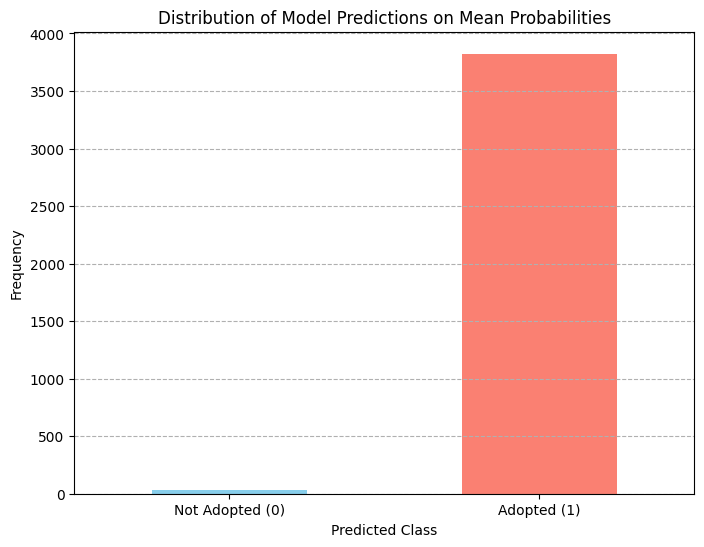

In [29]:
import matplotlib.pyplot as plt


distribution_counts = mean_probabilities_df['Prediction'].value_counts().sort_index()

plt.figure(figsize=(8, 6))  
distribution_counts.plot(kind='bar', color=['skyblue', 'salmon'])  

plt.title('Distribution of Model Predictions on Mean Probabilities')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')

unique_predictions = distribution_counts.index  

labels = {0: 'Not Adopted (0)', 1: 'Adopted (1)'}
plt.xticks(ticks=range(len(unique_predictions)), labels=[labels[pred] for pred in unique_predictions], rotation=0)

plt.grid(axis='y', linestyle='--')  

plt.show()


Test_prediction

In [30]:
# Export the DataFrame to a CSV file
mean_probabilities_df[['PetID', 'Prediction']].to_csv('pet_predictions_test.csv', index=False)


Train_preditcion

In [31]:
submission_train_dict = {'PetID': [], 'filename': []}

for name in train_image_names:
    pet_id = name.split('-')[0]
    submission_train_dict['PetID'].append(pet_id)
    submission_train_dict['filename'].append(name)
    
submission_train_df = pd.DataFrame(submission_train_dict)
submission_train_df.head()

,PetID,filename
0,cf8d949f9,cf8d949f9-2.jpg
1,61d4dc56b,61d4dc56b-12.jpg
2,53923463d,53923463d-9.jpg
3,0173c456c,0173c456c-8.jpg
4,fa7c7d1be,fa7c7d1be-3.jpg


In [32]:
train_generator = ImageDataGenerator(rescale=1/255.).flow_from_dataframe(
    submission_train_df,
    '../input/train_images',
    has_ext=True,
    target_size=(400, 300),
    color_mode='rgb',
    batch_size=256,
    shuffle=False,
    class_mode=None
)

Found 58311 validated image filenames.


In [33]:
train_predictions = model.predict(
    train_generator,
    verbose=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step


In [34]:
# Step 1: Ensure 'Probability' is in the DataFrame
submission_train_df['Probability'] = [prob[0] for prob in train_predictions]  

# Step 2: Group by 'PetID' to calculate mean probabilities
train_mean_probabilities_df = submission_train_df.groupby('PetID', as_index=False)['Probability'].mean()

# Step 3: Calculate binary predictions based on the mean probability
train_mean_probabilities_df['Prediction'] = (train_mean_probabilities_df['Probability'] > 0.65).astype(int)

# The result is mean_probabilities_df with columns 'PetID', 'Probability', and 'Prediction'
print(train_mean_probabilities_df.head())

       PetID  Probability  Prediction
0  0008c5398     0.799052           1
1  000a290e4     0.728118           1
2  000fb9572     0.964852           1
3  0011d7c25     0.819545           1
4  00156db4a     0.682896           1


In [35]:
# Calculate the distribution of binary predictions
train_distribution_counts = train_mean_probabilities_df['Prediction'].value_counts()

# Print the distribution
print("Distribution of Train Predictions (0 and 1):")
print(train_distribution_counts)

Distribution of Train Predictions (0 and 1):
Prediction
1    14471
0      181
Name: count, dtype: int64


In [36]:
# Export the DataFrame to a CSV file
train_mean_probabilities_df[['PetID', 'Prediction']].to_csv('train_pet_predictions_test.csv', index=False)
